<a href="https://colab.research.google.com/github/NautilusCarpenter/AlgorithmicTrading/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# save to drive then submit to github
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [ ]:
os.chdir("/content/gdrive/MyDrive/Ubiquant") # need to add Ubiquant folder to shortcut
os.listdir()

['kaggle.json',
 '__init__.py',
 'competition.cpython-37m-x86_64-linux-gnu.so',
 'example_test.csv',
 'example_sample_submission.csv',
 'Copy of Making the most of your colab subscription',
 'train.pkl',
 'data_reader.ipynb',
 'data_import.ipynb',
 'exploratory_data_analysis.ipynb']

In [ ]:
train = pd.read_pickle("train.pkl")
train.head()

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,...,f_260,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,0.965623,1.230508,0.114809,-2.012777,0.004936,0.284220,0.502155,-0.287932,-1.169338,-0.267310,-0.574423,-0.771869,1.012212,-1.230507,1.785726,-2.090686,0.325659,-0.877769,1.048786,0.131774,-0.349609,-1.813385,0.099226,-0.241020,1.604571,0.003637,-0.902062,0.221581,0.610063,-0.738558,...,-1.158173,0.709600,-0.031878,-1.020150,-1.291206,0.038669,0.187159,-0.680358,0.900593,-0.924766,-1.057890,-0.167062,0.0,1.281245,0.258715,-0.237964,-0.742125,-0.324677,0.992547,0.961355,-0.025610,-0.006259,0.473603,0.040136,0.453711,-1.597790,0.301659,0.157470,0.416631,1.506131,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,1.428127,1.134144,0.114809,-0.219201,-0.351726,0.846882,0.440299,0.499824,0.893144,-0.010217,-0.681523,1.254092,-1.026969,-1.690156,0.011152,0.875251,0.325659,-0.458305,-1.797581,-0.300364,0.584786,0.551460,0.806422,1.235012,-0.984701,-1.084491,3.161929,0.211016,-2.656093,-0.176984,...,-0.767070,-0.015459,-0.158329,0.980246,0.799270,0.798399,-0.633207,0.779735,0.171233,1.165891,0.590802,0.118520,0.0,-0.650803,0.851905,0.086198,1.135668,0.298990,-1.583445,-0.481945,0.532229,0.226693,-0.894744,-0.514552,-1.000073,0.884377,-0.557502,-0.875265,-0.156106,0.537055,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,0.979656,-1.125681,0.114809,-1.035376,0.465096,0.150847,-0.044009,0.091257,-1.169338,-0.451820,-0.467322,0.095288,1.140719,-0.166894,-0.007295,-0.449418,0.325659,-0.682472,0.016262,0.026124,-0.547330,0.551460,-0.261588,-0.169659,0.857397,-0.098464,-0.860326,0.180221,0.610063,0.524984,...,1.066427,-0.528562,0.189412,-1.020150,0.169625,-0.911228,-0.222071,0.536386,-0.161757,-0.114321,0.433277,-0.207127,0.0,0.098910,-0.725177,-0.388189,0.062644,0.260281,0.980960,0.899393,-0.315315,0.150139,0.245546,-1.429645,-1.000073,-0.033494,-0.147156,-0.087518,0.098443,-0.529027,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,0.778096,0.298990,0.114809,-1.176410,0.301204,-0.015678,-0.656295,-0.150829,-1.169338,-1.121598,-0.681523,2.921973,1.179453,0.363938,0.365656,-1.478154,0.325659,0.955586,-0.105029,-0.588826,0.650101,-1.813385,-1.421967,1.526105,-0.054643,-0.345506,0.259390,0.124939,-0.478656,-0.457771,...,-1.434426,0.084240,-0.836248,-1.020150,1.272106,-0.667804,-1.452159,1.169093,-1.024947,-0.924766,1.013206,-0.324558,0.0,-0.817650,-0.624180,0.012915,0.599156,-1.796107,-1.843759,2.927223,-0.640443,2.324936,-0.666686,-0.049966,-1.000073,-0.172537,-0.557502,-0.986692,-0.744752,0.237733,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,-0.946789,1.230508,0.114809,-0.005858,0.498780,-0.235516,-0.173336,0.106523,-0.138097,-0.829021,-0.826026,4.070158,0.148330,0.269455,-0.046685,0.194325,0.325659,1.933630,-1.119676,-0.585332,0.535749,0.551460,-0.771058,0.216229,0.022421,-0.924428,0.198084,0.232416,-1.567374,-0.317377,...,0.793056,-1.657286,-0.874886,0.980246,0.778769,-0.916315,-0.556130,0.925744,-1.508002,1.165891,0.941384,-0.501547,0.0,-1.332959,-0.767390,-0.237964,0.330900,-1.465071,-0.585437,-1.314835,-0.781270,-1.918721,-0.438

From Gou Ming:

Dataset descriptions

row_id - A unique identifier for the row. \

time_id - The ID code for the time the data was gathered. The time IDs are in order, but the real time between the time IDs is not constant and will likely be shorter for the final private test set than in the training set. \

investment_id - The ID code for an investment. Not all investment have data in all time IDs. \

target - The target. \

[f_0:f_299] - Anonymized features generated from market data.

Original page for the EDA: https://www.kaggle.com/lucamassaron/eda-target-analysis

In [ ]:
obs = train.shape[0]
print(f"number of observations: {obs}")

number of observations: 3141410


In [ ]:
time_steps, assets = train.time_id.nunique(), train.investment_id.nunique()
print(f"number of assets: {assets} \t time steps: {time_steps}")

number of assets: 3579 	 time steps: 1211


In [ ]:
print(f"number of assets: {assets} (range from {train.investment_id.min()} to {train.investment_id.max()})")

number of assets: 3579 (range from 0 to 3773)


The range of assets is more extended than the number fo assets themselves. In fact, assets will change in part in the test set, therefore you have to consider strategies for handling the ones in the training set in a generalizable way. See: https://www.kaggle.com/c/ubiquant-market-prediction/discussion/301693#1656092

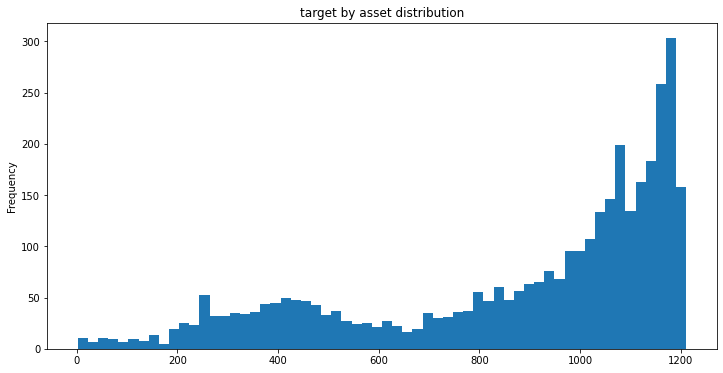

In [ ]:
obs_by_asset = train.groupby(['investment_id'])['target'].count()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
obs_by_asset.plot.hist(bins=60)
plt.title("target by asset distribution")
plt.show()

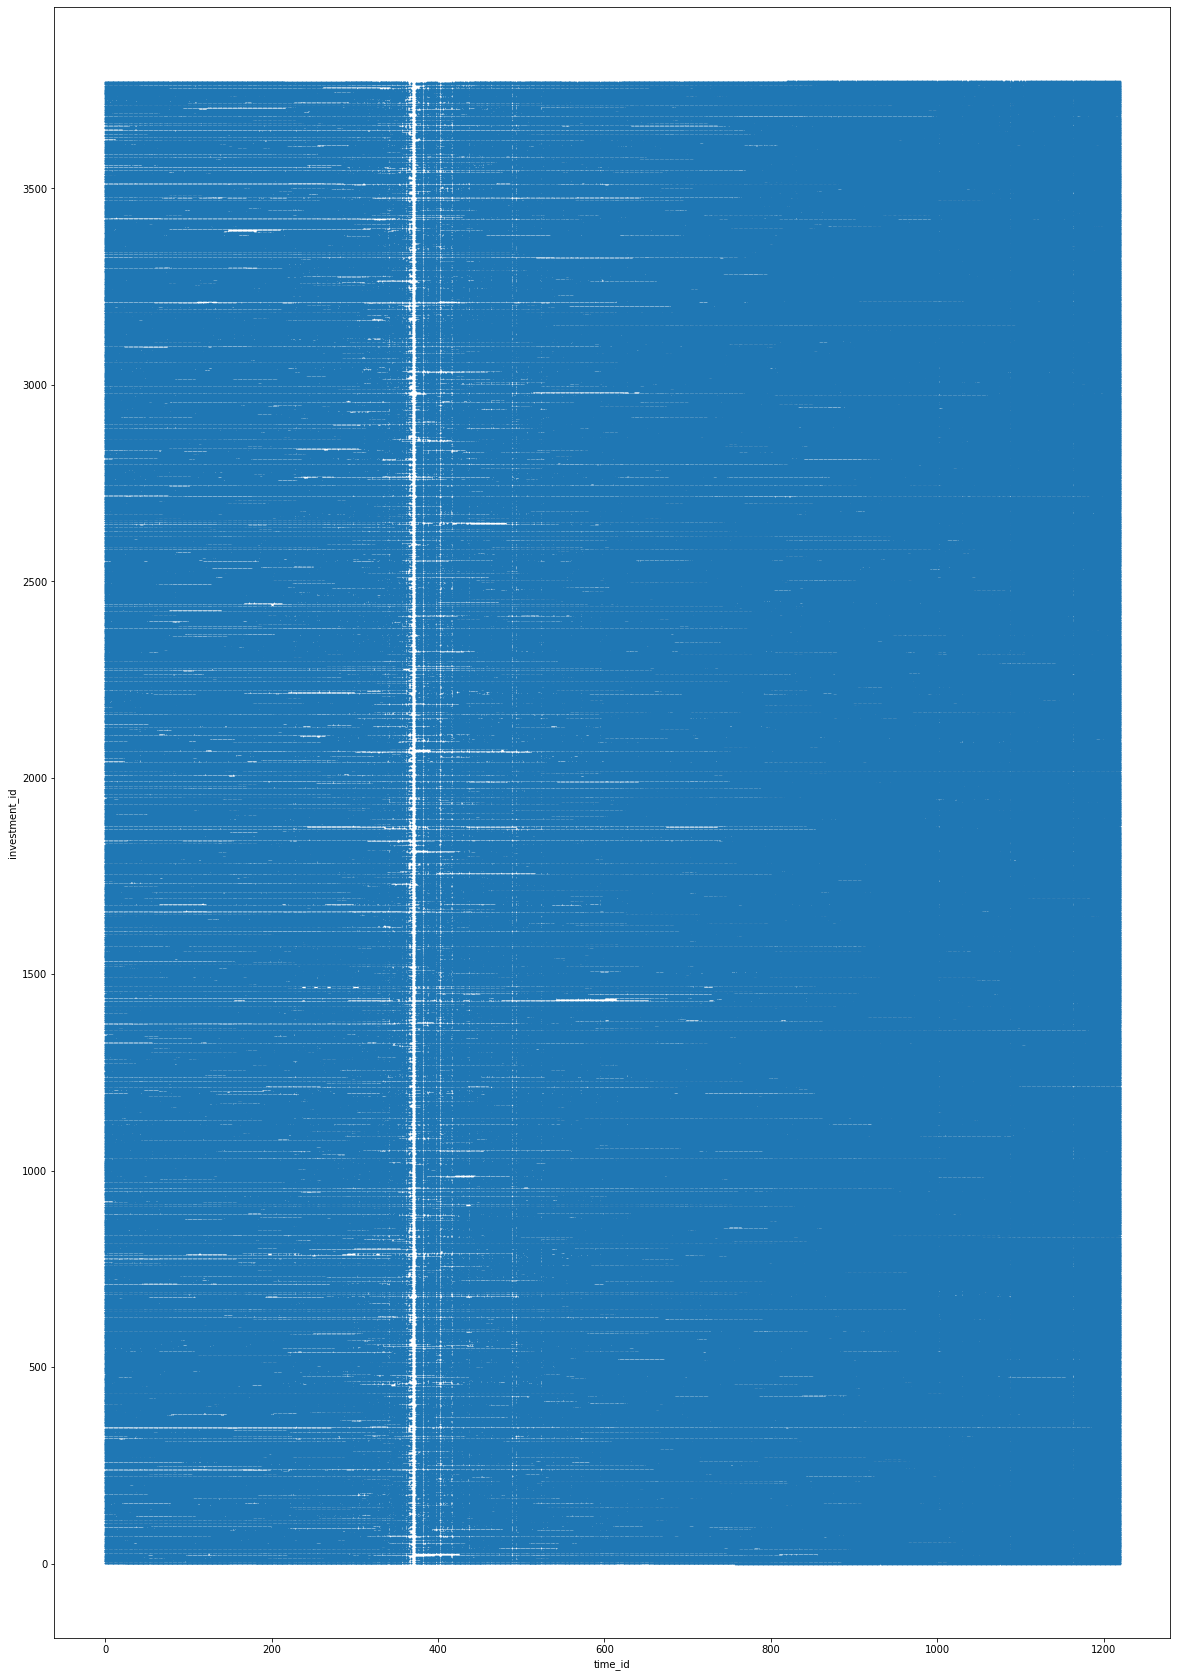

In [ ]:
train[['investment_id', 'time_id']].plot.scatter('time_id', 'investment_id', figsize=(20, 30), s=0.5)
plt.show()

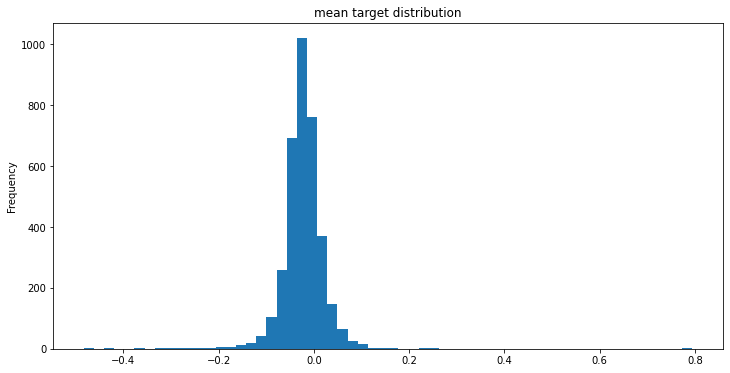

Mean of mean target: -0.02310


In [ ]:
mean_target = train.groupby(['investment_id'])['target'].mean()
mean_mean_target = np.mean(mean_target)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
mean_target.plot.hist(bins=60)
plt.title("mean target distribution")
plt.show()

print(f"Mean of mean target: {mean_mean_target: 0.5f}")

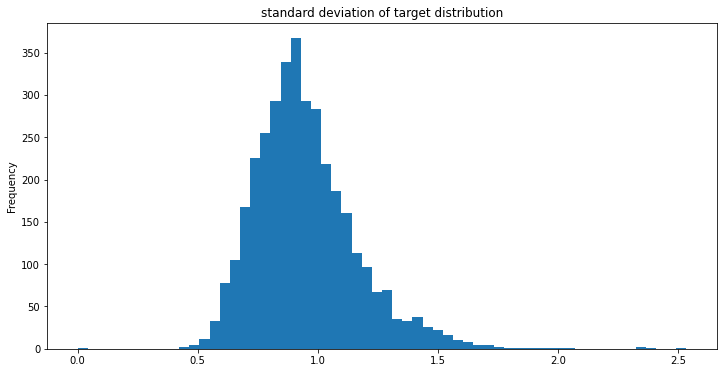

Mean of std target:  0.94790


In [ ]:
sts_target = train.groupby(['investment_id'])['target'].std()
mean_std_target = np.mean(sts_target)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sts_target.plot.hist(bins=60)
plt.title("standard deviation of target distribution")
plt.show()

print(f"Mean of std target: {mean_std_target: 0.5f}")

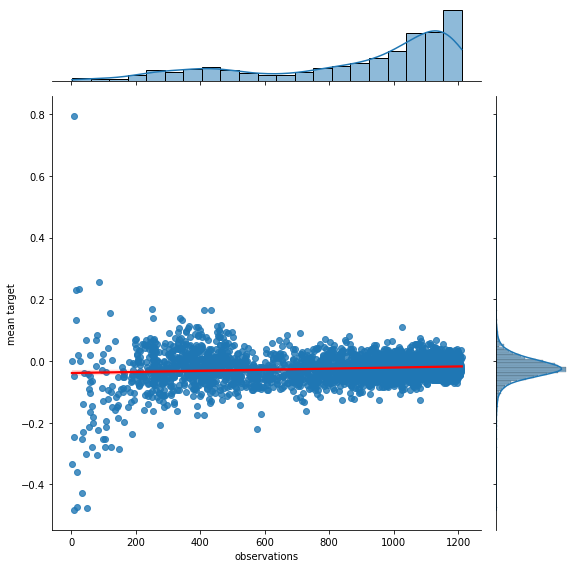

In [ ]:
ax = sns.jointplot(x=obs_by_asset, y=mean_target, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':'red'}})
ax.ax_joint.set_xlabel('observations')
ax.ax_joint.set_ylabel('mean target')
plt.show()

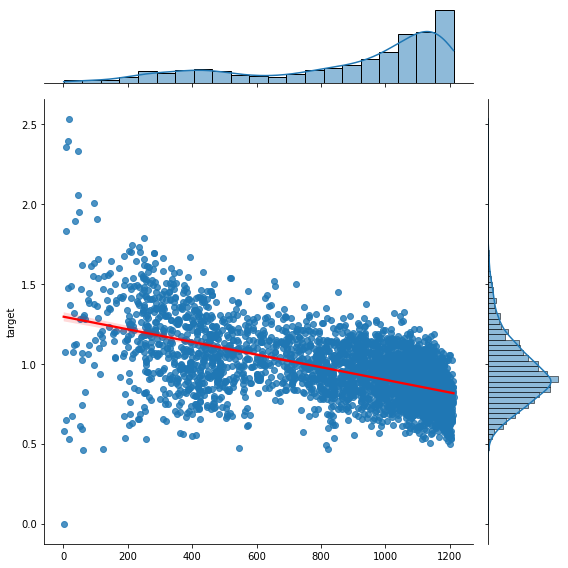

In [ ]:
qx = sns.jointplot(x=obs_by_asset.values, y=sts_target, kind="reg", 
                   height=8, joint_kws={'line_kws':{'color':'red'}})
ax.ax_joint.set_xlabel('observations')
ax.ax_joint.set_ylabel('std target')
plt.show()

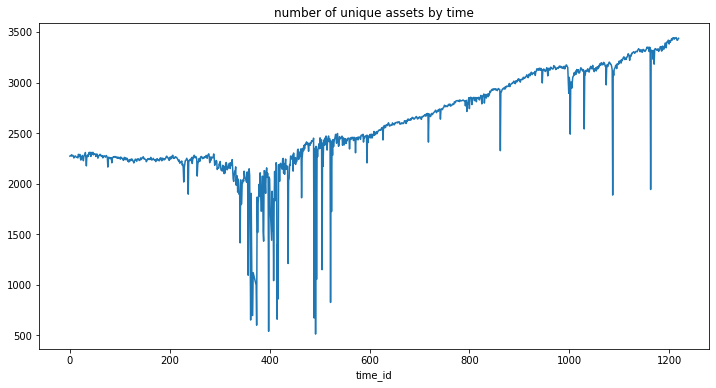

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train.groupby('time_id')['investment_id'].nunique().plot()
plt.title("number of unique assets by time")
plt.show()

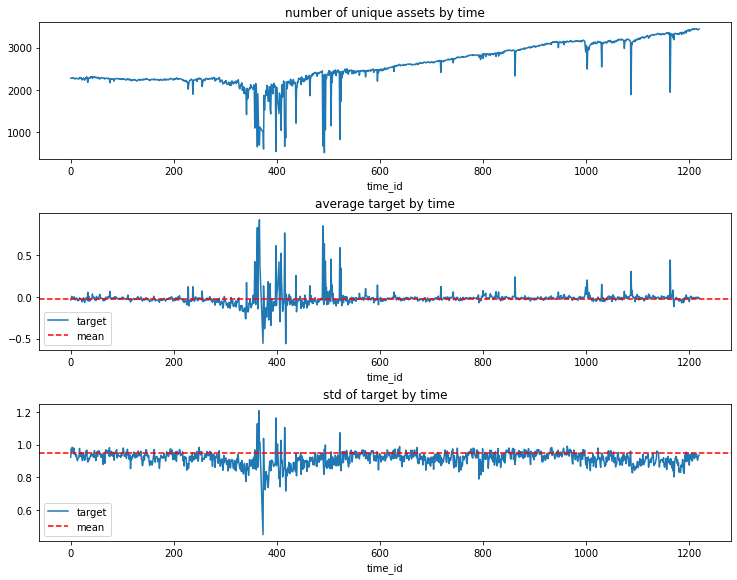

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1,)
(train.groupby('time_id')['investment_id'].nunique()).plot()
plt.title("number of unique assets by time")

plt.subplot(3, 1, 2)
train.groupby('time_id')['target'].mean().plot()
plt.title("average target by time")
plt.axhline(y=mean_mean_target, color='r', linestyle='--', label="mean")
plt.legend(loc='lower left')

plt.subplot(3, 1, 3)
train.groupby('time_id')['target'].std().plot()
plt.title("std of target by time")
plt.axhline(y=mean_std_target, color='r', linestyle='--', label="mean")
plt.legend(loc='lower left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.3, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [ ]:
r = np.corrcoef(train.groupby('time_id')['investment_id'].nunique(), train.groupby('time_id')['target'].mean())[0][1]
print(f"Correlation of number of assets by target: {r:0.3f}")

Correlation of number of assets by target: -0.184


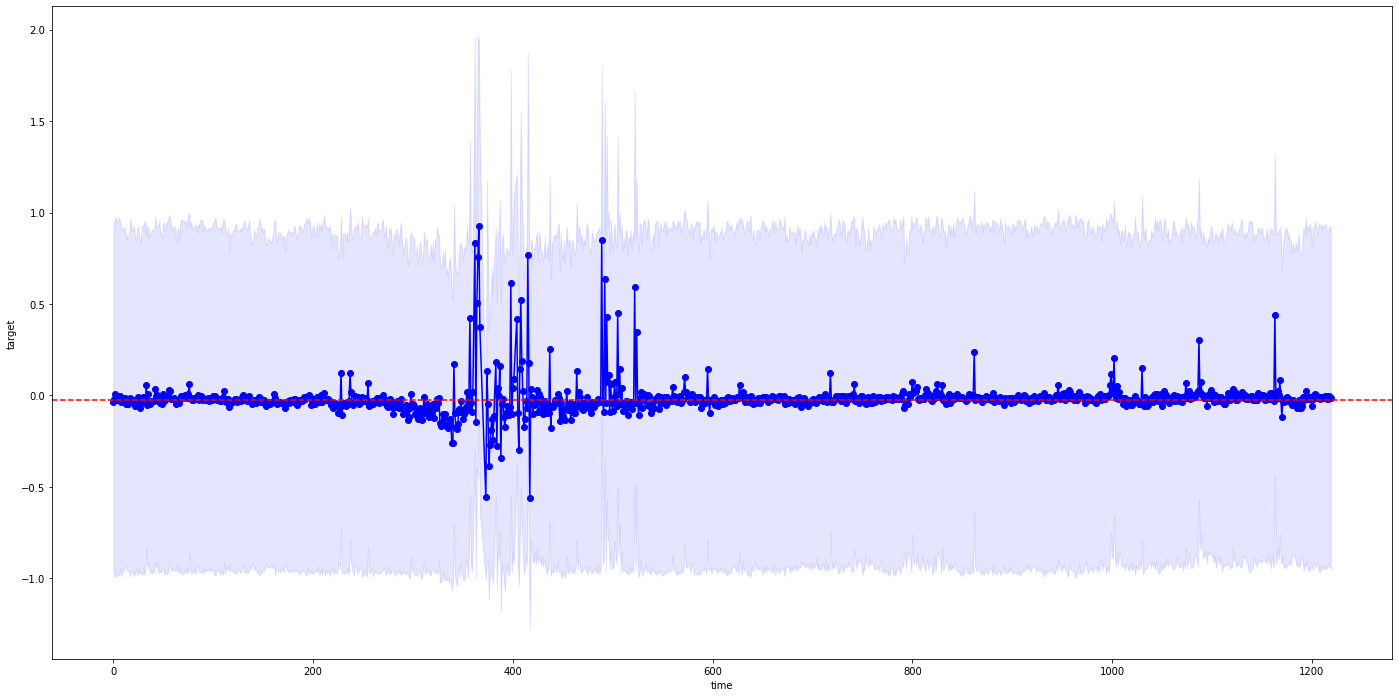

In [ ]:
time2target_mean = train.groupby(['time_id'])['target'].mean()
time2target_std = train.groupby(['time_id'])['target'].std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color="b", label="Training score"
    )
plt.axhline(y=mean_mean_target, color='r', linestyle='--', label="mean")
axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

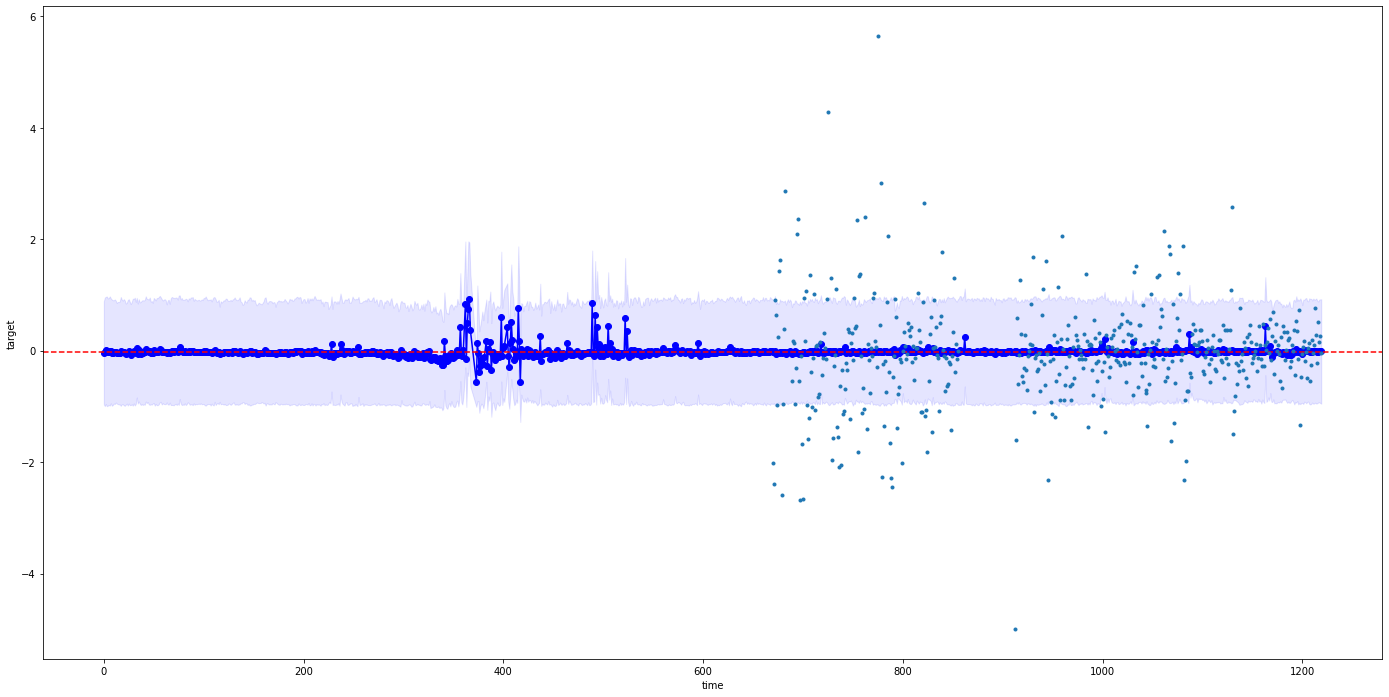

In [ ]:
time2target_mean = train.groupby(['time_id'])['target'].mean()
time2target_std = train.groupby(['time_id'])['target'].std()

_, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.fill_between(
        time2target_mean.index,
        time2target_mean - time2target_std,
        time2target_mean + time2target_std,
        alpha=0.1,
        color="b",
    )
plt.plot(
        time2target_mean.index, time2target_mean, "o-", color="b", label="Training score"
    )
plt.axhline(y=mean_mean_target, color='r', linestyle='--', label="mean")

asset = 70
plt.plot(train[train.investment_id==asset].time_id,
               train[train.investment_id==asset].target, '.')

axes.set_ylabel("target")
axes.set_xlabel("time")
plt.show()

In [ ]:
obs_by_asset = train.groupby(['investment_id'])['target'].count().to_dict()
target = train.investment_id.copy().replace(obs_by_asset).astype(np.int16)
features = train.columns[4:]

del(obs_by_asset)

NameError: ignored

In [ ]:
corrs = list()
for col in features:
    corr = np.corrcoef(target, train[col])[0][1]
    corrs.append(corr)
    
del(target)

NameError: ignored

In [ ]:
feat_importances = pd.Series(corrs, index=features)
feat_importances.nlargest(20).plot(kind='barh', figsize=(12, 6)).invert_yaxis()
plt.show()